In [1]:
# імпорт бібліотек
import numpy as np 
import pandas as pd

from calendar import monthrange
import datetime
from pytrends.request import TrendReq

In [2]:
pytrends = TrendReq(hl='en-US', tz=360) # відключення до Гугл

### Create daily data

In [3]:
last_day_months= pd.date_range(start = '2010-01-01', end= '2021-05-01', freq='M').to_numpy().astype('datetime64[D]').astype('str')
last_day_months

array(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
       '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
       '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
       '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
       '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
       '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
       '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
       '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
       '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
       '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
       '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
       '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
       '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
       '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
       '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
       '2015-01-31', '2015-02-28', '2015-03-31', '2015-

In [4]:
first_day_months = np.arange('2010-01-01', '2021-05-01', dtype = 'datetime64[M]').astype('datetime64[D]').astype('str')
first_day_months

array(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
       '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
       '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
       '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
       '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
       '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
       '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
       '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
       '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
       '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
       '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
       '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
       '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
       '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
       '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
       '2015-01-01', '2015-02-01', '2015-03-01', '2015-

In [5]:
z = list(zip(first_day_months, last_day_months))
z

[('2010-01-01', '2010-01-31'),
 ('2010-02-01', '2010-02-28'),
 ('2010-03-01', '2010-03-31'),
 ('2010-04-01', '2010-04-30'),
 ('2010-05-01', '2010-05-31'),
 ('2010-06-01', '2010-06-30'),
 ('2010-07-01', '2010-07-31'),
 ('2010-08-01', '2010-08-31'),
 ('2010-09-01', '2010-09-30'),
 ('2010-10-01', '2010-10-31'),
 ('2010-11-01', '2010-11-30'),
 ('2010-12-01', '2010-12-31'),
 ('2011-01-01', '2011-01-31'),
 ('2011-02-01', '2011-02-28'),
 ('2011-03-01', '2011-03-31'),
 ('2011-04-01', '2011-04-30'),
 ('2011-05-01', '2011-05-31'),
 ('2011-06-01', '2011-06-30'),
 ('2011-07-01', '2011-07-31'),
 ('2011-08-01', '2011-08-31'),
 ('2011-09-01', '2011-09-30'),
 ('2011-10-01', '2011-10-31'),
 ('2011-11-01', '2011-11-30'),
 ('2011-12-01', '2011-12-31'),
 ('2012-01-01', '2012-01-31'),
 ('2012-02-01', '2012-02-29'),
 ('2012-03-01', '2012-03-31'),
 ('2012-04-01', '2012-04-30'),
 ('2012-05-01', '2012-05-31'),
 ('2012-06-01', '2012-06-30'),
 ('2012-07-01', '2012-07-31'),
 ('2012-08-01', '2012-08-31'),
 ('2012-

In [6]:
#створення щоденних даних
def create_df(periods):
    kw_list = ["goldman sachs"] 

    final_df = pd.DataFrame()
    for i in periods:
        pytrends.build_payload(kw_list, timeframe=str(i[0]) +' '+ str(i[1]), geo='US') #запит даних за 1 місяць
        df = pytrends.interest_over_time()
        df.drop(['isPartial'], axis=1, inplace=True)

        final_df = pd.concat([final_df, df]) #додання в датасет
        
    return final_df

In [7]:
%%time
daily_df = create_df(z)

Wall time: 2min 16s


In [8]:
daily_df #датасет зі щоденними даними

,goldman sachs
date,
2010-01-01,20
2010-01-02,25
2010-01-03,25
2010-01-04,49
2010-01-05,39
...,...
2021-04-26,49
2021-04-27,49
2021-04-28,63


In [9]:
daily_df.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\google_trends\GSGoogleTrends_daily.csv')

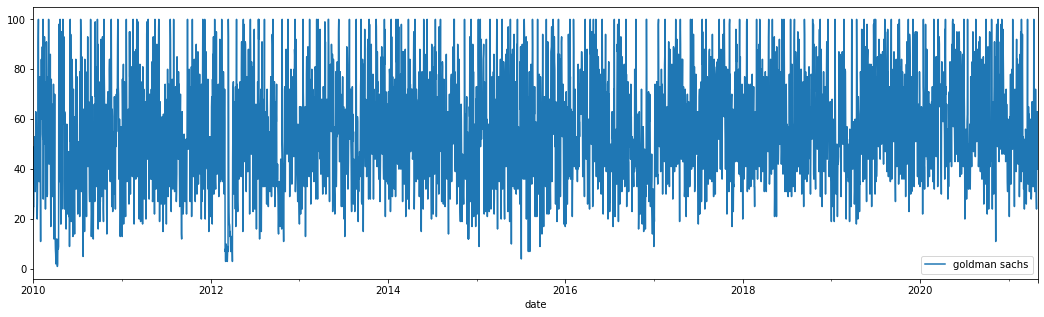

In [10]:
daily_df.plot(figsize = (18,5)); #візуалізація

### Create month data

In [11]:
#створення запиту на щомісячні дані за 10 років
kw_list = ["goldman sachs"]
pytrends.build_payload(kw_list, timeframe='2010-01-1 2021-05-01', geo='US')
month_df = pytrends.interest_over_time()
month_df.drop(['isPartial'], axis=1, inplace=True)

In [12]:
month_df

,goldman sachs
date,
2010-01-01,37
2010-02-01,34
2010-03-01,29
2010-04-01,100
2010-05-01,38
...,...
2021-01-01,20
2021-02-01,20
2021-03-01,25


In [13]:
month_df.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\google_trends\GSGoogleTrends_monthly.csv')

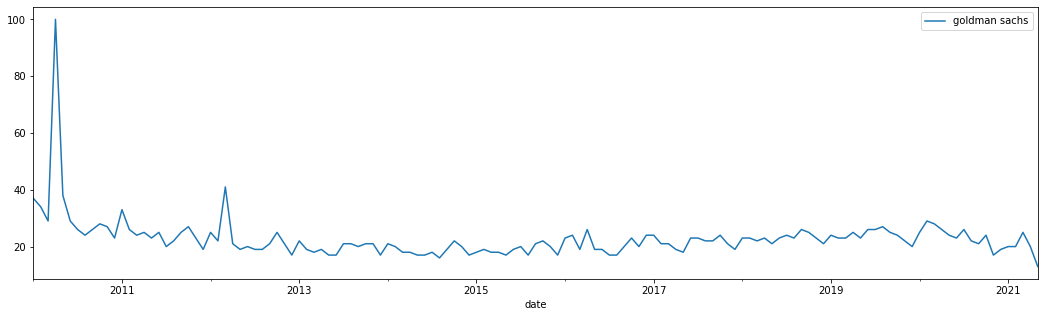

In [14]:
month_df.plot(figsize = (18,5)); #візуалізація

### Stack dfs together

In [15]:
daily_df.reset_index()

,date,goldman sachs
0,2010-01-01,20
1,2010-01-02,25
2,2010-01-03,25
3,2010-01-04,49
4,2010-01-05,39
...,...,...
4133,2021-04-26,49
4134,2021-04-27,49
4135,2021-04-28,63
4136,2021-04-29,44


In [16]:
final_df = pd.DataFrame()
final_df = daily_df.copy().reset_index()
final_df = final_df.rename({'goldman sachs':'daily_data'}, axis=1)


In [17]:
#зведення даних  в єдиний датасет відповідно до дат
final_df['monthly_data'] = final_df['date'].map(lambda x: x.replace(day=1))\
                                          .map(month_df['goldman sachs'])
final_df['monthly_data'] = final_df['monthly_data'] / 100
final_df

,date,daily_data,monthly_data
0,2010-01-01,20,0.37
1,2010-01-02,25,0.37
2,2010-01-03,25,0.37
3,2010-01-04,49,0.37
4,2010-01-05,39,0.37
...,...,...,...
4133,2021-04-26,49,0.20
4134,2021-04-27,49,0.20
4135,2021-04-28,63,0.20
4136,2021-04-29,44,0.20


In [18]:
#отримання фінальних зважених даних
final_df['adjusted_data'] = final_df['monthly_data'] * final_df['daily_data']
final_df

,date,daily_data,monthly_data,adjusted_data
0,2010-01-01,20,0.37,7.40
1,2010-01-02,25,0.37,9.25
2,2010-01-03,25,0.37,9.25
3,2010-01-04,49,0.37,18.13
4,2010-01-05,39,0.37,14.43
...,...,...,...,...
4133,2021-04-26,49,0.20,9.80
4134,2021-04-27,49,0.20,9.80
4135,2021-04-28,63,0.20,12.60
4136,2021-04-29,44,0.20,8.80


In [19]:
final_df.set_index('date', inplace=True)
final_df

,daily_data,monthly_data,adjusted_data
date,,,
2010-01-01,20,0.37,7.40
2010-01-02,25,0.37,9.25
2010-01-03,25,0.37,9.25
2010-01-04,49,0.37,18.13
2010-01-05,39,0.37,14.43
...,...,...,...
2021-04-26,49,0.20,9.80
2021-04-27,49,0.20,9.80
2021-04-28,63,0.20,12.60


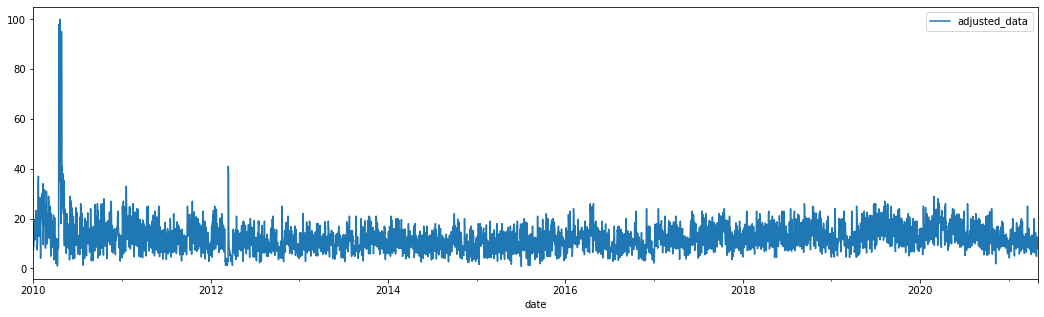

In [20]:
final_df[['adjusted_data']].plot(figsize = (18,5)); #візуалізація

In [21]:
#збереження даних
final_df.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\google_trends\GSGoogleTrends_final.csv')